In [1]:
import pandas as pd
import numpy as numpy
import scipy.spatial.distance as scp_dst
from scipy.spatial import distance
from sklearn.cluster import KMeans
# import matplotlib.colors as clrs
# import matplotlib.pyplot as plt
import json
from pprint import pprint
from pandas.io.json import json_normalize

with open('aminer_papers_0_s3.json') as data_file:    
    data0 = json.load(data_file)

In [353]:
df0 = pd.DataFrame.from_dict(json_normalize(data0), orient='columns')
# df1 = pd.DataFrame.from_dict(json_normalize(data1), orient='columns')
# df2 = pd.DataFrame.from_dict(json_normalize(data2), orient='columns')
# df3 = pd.DataFrame.from_dict(json_normalize(data3), orient='columns')

# df0 = pd.concat([df0, df1, df2, df3])

df0.head(10)


# Get CS keywords

df0_new = df0.dropna(subset=['keywords']) #262153
df0_new.head(20)

,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year
2,The method to making technology roadmap is int...,"[{u'name': u'MO Chou'}, {u'name': u'CHEN Jiqin...",NaN,53e99784b7602d9701f3e132,NaN,NaN,19,"[science and technology production, technology...",zh,NaN,95,90,NaN,NaN,Practice Research on Technology Roadmap for El...,NaN,Science and Technology Management Research,NaN,2013.0
3,Drought is the first place in all the natural ...,"[{u'name': u'Peijuan Wang'}, {u'name': u'Jiahu...",10.1109/IGARSS.2011.6049503,53e99784b7602d9701f3e133,NaN,NaN,null,"[canopy parameters, canopy spectrum, different...",en,NaN,1933,1930,NaN,"[53e999c3b7602d970220b9b7, 53e9b1d6b7602d9703c...",The relationship between canopy parameters and...,[http://dx.doi.org/10.1109/IGARSS.2011.6049503],IGARSS,null,2011.0
4,Determination of total sugar can serve to moni...,[{u'org': u'Yantai Institute of Coastal Zone R...,NaN,53e99784b7602d9701f3e135,NaN,NaN,07,"[metabolites, Jerusalem artichoke, total sugar...",zh,1.0,93+97,90,NaN,NaN,The effect of metabolites on the determination...,NaN,Food Science and Technology,NaN,2012.0
7,This paper discussed the planning and design m...,[{u'org': u'School of Resource and Environment...,NaN,53e99784b7602d9701f3e139,NaN,NaN,28,"[Planning and design method, Mountainous regio...",zh,1.0,364,362,NaN,NaN,Planning and Design Method of Land Consolidati...,NaN,Journal of Anhui Agricultural Sciences,NaN,2012.0
8,Rough set is a mathematical tool to deal with ...,NaN,NaN,53e99784b7602d9701f3e13a,NaN,NaN,11,"[Data Mining, Rough Set, Algorithm, Rules Extr...",zh,3.0,106,104,NaN,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012.0
12,Tumor necrosis factor-alpha (TNF-α) is a multi...,"[{u'org': u'Department of Biology, Faculty of ...",10.1007/s11010-010-0678-0,53e99784b7602d9701f3e13e,NaN,1573-4919,1-2,[glucagon-like peptide-2 � tnf-a/actinomycin d...,en,NaN,27,13,NaN,"[53e99b4ab7602d97023ea8fd, 53e997f8b7602d9701f...",The role of glucagon-like peptide-2 on apoptos...,"[http://dx.doi.org/10.1007/s11010-010-0678-0, ...",Molecular and cellular biochemistry,350,2011.0
14,The carbon fiber used PAN as precursor is wide...,[{u'org': u'China Synthetic Fiber Information ...,NaN,53e99784b7602d9701f3e140,NaN,NaN,10,"[production technology, carbon fiber, present ...",zh,18.0,10+22,5,NaN,NaN,Present Situation of China Carbon Fiber Indust...,NaN,Synthetic Fiber in China,NaN,2009.0
15,NaN,"[{u'name': u'Carmen Sandoval C'}, {u'name': u'...",10.4067/S0716-10182008000600009,53e99784b7602d9701f3e141,NaN,NaN,6,"[severity of illness index, retrospective stud...",en,NaN,NaN,NaN,NaN,"[53e9b458b7602d9703f55c97, 53e9bc79b7602d97048...",Síndrome de Ramsay-Himt en Pediatría: Reporte ...,[http://dx.doi.org/10.4067/S0716-1018200800060...,Revista Chilena De Infectologia,25,2008.0
16,Using a cryogenic scanned probe microscope (SP...,[{u'org': u'Division of Applied Sciences and D...,10.1006/spmi.1996.0100,53e99784b7602d9701f3e142,NaN,Superlattices and Microstructures,4,"[scanning probe microscope, two dimensional el...",en,18.0,440,435,NaN,NaN,Effect of a charged scanned probe microscope t...,[http://dx.doi.org/10.1006/spmi.1996.0100],Superlattices and Microstructures,20,1996.0
23,This paper presents an embedded controller of ...,NaN,NaN,53e99784b7602d9701f3e150,NaN,NaN,02,"[communication protocol, FT245BM chip, embedde...",zh,1.0,45,43,NaN,NaN,The application of an embedded controller to a...,NaN,Industrial Instrumentation & Automation,NaN,2005.0


In [354]:
from collections import defaultdict

df0_new.shape

keyword_count = defaultdict(dict)
for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in keyword_count):
            keyword_count[low_case_keyword] = keyword_count[low_case_keyword] + 1
        else:
            keyword_count[low_case_keyword] = 0
        break;

In [355]:
# keyword_count

keyword_count_sorted = sorted(keyword_count.items(), key=lambda x: x[1], reverse=True)
keyword_count_sorted
#     print (keyword)
#     print (count)
#     break

[(u'bioinformatics', 5038),
 (u'biomedical research', 4859),
 (u'nature', 3647),
 (u'british', 1240),
 (u'genetics', 709),
 (u'indexation', 372),
 (u'first page', 344),
 (u'spectrum', 319),
 (u'higher education', 314),
 (u'enzyme', 275),
 (u'diagnosis', 272),
 (u'kinetics', 263),
 (u'iron', 247),
 (u'satisfiability', 242),
 (u'oscillations', 240),
 (u'diabetes mellitus', 229),
 (u'application', 226),
 (u'humanidades', 214),
 (u'high energy physics', 208),
 (u'null', 203),
 (u'cutaneous biology', 202),
 (u'public health', 194),
 (u'global warming', 194),
 (u'human factors', 193),
 (u'risk factors', 185),
 (u'thermodynamics', 185),
 (u'pediatric', 181),
 (u'ergonomics', 180),
 (u'injury prevention', 178),
 (u'nursing', 178),
 (u'magnetic field', 177),
 (u'copper', 177),
 (u'american college of gastroenterology', 176),
 (u'quantum mechanics', 176),
 (u'cross section', 175),
 (u'occupational safety', 174),
 (u'breast cancer', 173),
 (u'text mining', 166),
 (u'health care', 166),
 (u'digita

In [356]:
cs_keywords = ['internet','text mining','data mining', 'polymorphism','mathematical model','information','information technology', 'data', 'algorithms', 'training', 
              'model','data collection','analysis','neural network','data analysis','computer science', 'information retrieval', 'information system', 'classification','pattern recognition'
               'signal processing','software engineering','social network','software system','image processing','data processing',
              'computer simulation','statistical analysis','image', 'video', 'machine', 'learning', 'computer', 'optimization', 'artificial', 'intelligence', 'complexity', 'neaural network']
cs_papers = []

for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in cs_keywords):
            cs_papers.append(row[4])
            break;
                          
# cs_papers.get(0) #10617
len(cs_papers)

10617

In [357]:
import math
import types

cs_papers_and_ref_papers = dict()

for row in df0.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in cs_keywords):
            cs_papers_and_ref_papers[row[4]] = True
            references = row[14]
            if(type(references) is list):   
                for ref in references:
                    cs_papers_and_ref_papers[ref] = True
            break;
 


In [358]:
cs_dataframe = df0_new.loc[df0_new['id'].isin(cs_papers_and_ref_papers.keys())]
len(cs_dataframe)

12101

In [359]:
cs_papers_number_map = {}
index = 0 # TODO: Deep-walk label starts from '1' afaik
for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    cs_papers_number_map[current_paper_id] = index
    index = index + 1
cs_papers_number_map 

{u'53e99822b7602d9702042710': 10441,
 u'53e99813b7602d970202955d': 8729,
 u'53e997a6b7602d9701f796e6': 510,
 u'53e99818b7602d970203574a': 9522,
 u'53e99796b7602d9701f5d97b': 140,
 u'53e99809b7602d970201e468': 7992,
 u'53e99831b7602d9702055063': 11510,
 u'53e99800b7602d970200d6d0': 6939,
 u'53e99822b7602d97020412bc': 10316,
 u'53e99818b7602d9702030e40': 9265,
 u'53e99809b7602d970202077c': 8179,
 u'53e9980eb7602d97020219b1': 8277,
 u'53e99832b7602d9702057eb4': 11704,
 u'53e997e3b7602d9701fd8d70': 3661,
 u'53e9982cb7602d9702052974': 11358,
 u'53e997f4b7602d9701ff5ffb': 5439,
 u'53e997d1b7602d9701fc2cdb': 2000,
 u'53e997d7b7602d9701fca54f': 2563,
 u'53e99837b7602d970205e389': 12082,
 u'53e997d7b7602d9701fcf9a8': 2962,
 u'53e997e3b7602d9701fd8f5f': 3677,
 u'53e997d1b7602d9701fc240a': 1899,
 u'53e997edb7602d9701fedc0a': 4931,
 u'53e99800b7602d970200d6de': 6940,
 u'53e9981db7602d97020384c0': 9660,
 u'53e997e4b7602d9701fde89f': 4128,
 u'53e99800b7602d970200f3c3': 7046,
 u'53e99833b7602d9702058

In [360]:
# cs_dataframe=cs_dataframe_new.copy()

In [361]:
from collections import defaultdict

# safety checks - 
cs_dataframe = cs_dataframe.dropna(subset=['id'])
 
citation_graph_adj_list = {}

# cnt = 0
for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    references = row[14]
    if(type(references) is list): 
        for ref in references:
            # Ignore the paper for which we don't have entry in cs_paper -- not a "cs_paper"
            if (ref in cs_papers_number_map): 
                ref_number = cs_papers_number_map[ref]
#                 print (ref_number)
#     cnt = cnt + 1            
#     if( cnt > 500):
#         break 
                # Putting an edge in the graph (adj_list)
                if (ref_number in citation_graph_adj_list):
                    elements = citation_graph_adj_list[ref_number]
                    elements.add(cs_papers_number_map[current_paper_id])
                    citation_graph_adj_list[ref_number] = elements
                else:    
                    first_element = set([cs_papers_number_map[current_paper_id]])
                    citation_graph_adj_list[ref_number] = first_element
        
citation_graph_adj_list 

{8200: {8199},
 8209: {8902, 9027},
 8210: {3310},
 8214: {4972},
 8215: {7170},
 8216: {8217},
 8217: {8217},
 8218: {8299},
 1371: {1207},
 8229: {9202, 9263},
 8230: {8223},
 8231: {8231},
 8243: {8082},
 8251: {6039, 6047},
 8254: {10754},
 8262: {7437},
 8263: {8854},
 8264: {3984, 6699},
 8265: {8265, 11059},
 8273: {664},
 8274: {314},
 8275: {5019, 11081},
 8276: {5963},
 8280: {942},
 89: {10015},
 8284: {5052, 6231},
 8290: {493},
 8303: {8192},
 8304: {313},
 8305: {5577},
 8306: {6761},
 8308: {5934},
 8309: {7349, 8322},
 119: {1540},
 121: {745, 3319, 10142},
 122: {7170, 7974},
 127: {10144},
 128: {5481},
 8322: {7349},
 8325: {4169},
 134: {8437},
 135: {6375},
 139: {11412},
 144: {9637},
 146: {145, 1126, 3762, 5317, 6710, 6771, 6819, 6942, 11171, 11727},
 8339: {7165, 8885},
 8340: {959, 5592, 8993, 10951},
 150: {11545},
 151: {516, 1050, 6025},
 155: {10185},
 156: {8995, 10016},
 157: {139, 377, 7366, 10717, 10982},
 158: {7335},
 159: {6558, 9968, 10546},
 164: 

In [362]:
data=pd.read_csv("new_merged_df.csv",sep='\t',low_memory=False,error_bad_lines=False)
print(data.shape)

(3201, 87)


In [363]:
data.head(1)

,Unnamed: 0,vertex_number,f1,f2,f3,f4,f5,f6,f7,f8,...,page_start,pdf,references,title,url,venue,volume,year,score,score_2
0,0,375,-2.912555,-0.017097,-0.116665,1.721948,2.095376,-2.418415,-1.995438,-1.168773,...,104,NaN,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012.0,8.505563,7.869293


In [385]:
import networkx as nx
G=nx.DiGraph()
#G.add_nodes_from(data["vertex_number"])

In [386]:
for key,value in citation_graph_adj_list.iteritems():
    for v in value:
        G.add_edge(key,v)

In [387]:
print(G.number_of_nodes())
print(G.number_of_edges())

3201
3299


In [477]:
pr = nx.pagerank(G.to_undirected())

In [478]:
pagerank_df=pd.DataFrame(pr.items(),columns=['vertex_number', 'pagerank'])

In [390]:
data_new=pd.merge(data,pagerank_df,on='vertex_number')

In [391]:
citations=G.out_degree()

In [392]:
citations=dict(citations)

In [393]:
citations

{8192: 0,
 8197: 0,
 8199: 0,
 8200: 1,
 8201: 0,
 8209: 2,
 8210: 1,
 8214: 1,
 8215: 1,
 8216: 1,
 8217: 1,
 8218: 1,
 8223: 0,
 8227: 3,
 8229: 2,
 8230: 1,
 8231: 1,
 9564: 0,
 8243: 1,
 8246: 0,
 8251: 2,
 8253: 0,
 8254: 1,
 8256: 0,
 8262: 1,
 8263: 1,
 8264: 2,
 8265: 2,
 8273: 1,
 8274: 1,
 8275: 2,
 8276: 1,
 8279: 0,
 8280: 1,
 89: 1,
 91: 0,
 8284: 2,
 8290: 1,
 8291: 0,
 8299: 0,
 110: 0,
 8303: 1,
 8304: 1,
 8305: 1,
 8306: 1,
 8308: 1,
 8309: 2,
 8310: 0,
 119: 1,
 121: 3,
 122: 2,
 8316: 0,
 127: 1,
 128: 1,
 8322: 1,
 8325: 1,
 134: 1,
 135: 1,
 136: 0,
 139: 1,
 1389: 1,
 144: 1,
 145: 0,
 146: 10,
 8339: 2,
 8340: 4,
 150: 1,
 151: 3,
 8346: 0,
 155: 1,
 156: 2,
 157: 5,
 158: 1,
 159: 3,
 8352: 0,
 8354: 0,
 164: 1,
 8357: 0,
 166: 1,
 8359: 1,
 168: 3,
 169: 0,
 8362: 1,
 173: 1,
 176: 3,
 8369: 0,
 1395: 6,
 180: 1,
 183: 2,
 185: 4,
 186: 1,
 187: 1,
 188: 2,
 190: 3,
 1365: 4,
 8386: 0,
 195: 1,
 196: 0,
 8389: 0,
 198: 1,
 200: 0,
 201: 0,
 8396: 1,
 206: 1,
 2

In [394]:
citation_df=pd.DataFrame(citations.items(),columns=['vertex_number', 'citations'])

In [395]:
data_new=pd.merge(data_new,citation_df,on='vertex_number')

In [479]:
data_new.to_csv("pagerank_scores.csv",sep='\t')

In [396]:
data_new.head(1)

,Unnamed: 0,vertex_number,f1,f2,f3,f4,f5,f6,f7,f8,...,references,title,url,venue,volume,year,score,score_2,pagerank,citations
0,0,375,-2.912555,-0.017097,-0.116665,1.721948,2.095376,-2.418415,-1.995438,-1.168773,...,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012.0,8.505563,7.869293,0.004784,1


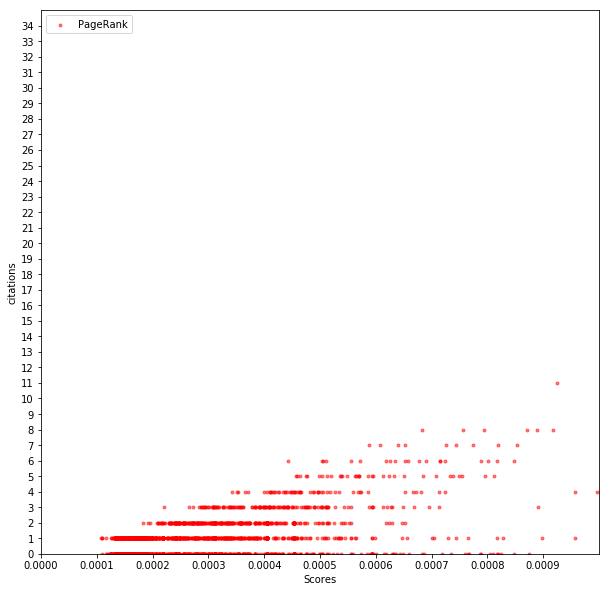

In [397]:
import numpy as np
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(data_new['pagerank'],  data_new['citations'],c='r', alpha=0.50,marker='.',label='PageRank')
#ax1.scatter(test_score_svr,  citations_test,c='b', alpha=0.50,marker='.',label='Predicted score')
plt.xlabel("Scores")
plt.ylabel("citations")
plt.yticks(np.arange(0,35, 1))
plt.xticks(np.arange(0,0.001,0.0001))
plt.xlim(0,0.001)
plt.ylim(0, 35)
plt.legend(loc=2)
plt.show()

In [455]:
data_new['pagerank']

0       0.004784
1       0.004109
2       0.003224
3       0.002732
4       0.002777
5       0.002325
6       0.002016
7       0.001681
8       0.001761
9       0.001487
10      0.001652
11      0.001231
12      0.001312
13      0.001278
14      0.001346
15      0.001411
16      0.001209
17      0.001356
18      0.000997
19      0.001046
20      0.000926
21      0.000957
22      0.000957
23      0.000847
24      0.001103
25      0.000824
26      0.001015
27      0.000871
28      0.001025
29      0.000786
          ...   
3171    0.000312
3172    0.000312
3173    0.000312
3174    0.000312
3175    0.000312
3176    0.000312
3177    0.000312
3178    0.000312
3179    0.000312
3180    0.000312
3181    0.000312
3182    0.000312
3183    0.000312
3184    0.000312
3185    0.000312
3186    0.000312
3187    0.000312
3188    0.000312
3189    0.000312
3190    0.000312
3191    0.000312
3192    0.000312
3193    0.000312
3194    0.000312
3195    0.000312
3196    0.000312
3197    0.000312
3198    0.0003

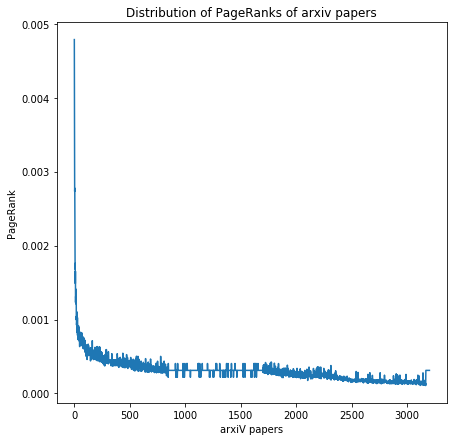

In [445]:
fig = plt.figure()
fig.set_size_inches(7, 7)
plt.plot(data_new['pagerank'])
plt.ylabel("PageRank")
plt.xlabel("arxiV papers")
plt.title("Distribution of PageRanks of arxiv papers")
plt.show()

In [399]:
features=data_new.loc[:,['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64','citations','pagerank'
                    ]]

In [400]:
citations=features['citations']
Y=features['pagerank']
X=features.drop('pagerank',1)

In [401]:
from sklearn import cross_validation
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,Y,test_size=0.25,random_state=5)

In [402]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2400, 65)
(801, 65)
(2400,)
(801,)


In [403]:
citations_train=X_train['citations']
X_train=X_train.drop('citations',1)
citations_test=X_test['citations']
X_test=X_test.drop('citations',1)

In [404]:
import sklearn
from sklearn.linear_model import LinearRegression
linearmodel=LinearRegression()
linearmodel.fit(X_train,Y_train)
train_score=linearmodel.predict(X_train)
test_score=linearmodel.predict(X_test)

mse_train=np.mean((Y_train-train_score)**2)
mse_test=np.mean((Y_test-test_score)**2)
print("training_error",mse_train)
print("testing_error",mse_test)
r2=linearmodel.score(X_test,Y_test)
print("r2",r2)

('training_error', 1.3206926729202771e-08)
('testing_error', 3.8223440675080725e-08)
('r2', 0.41549636934269774)


In [405]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(4, weights='distance')
knn.fit(X_train,Y_train)
train_score_knn=knn.predict(X_train)
test_score_knn=knn.predict(X_test)

mse_train_knn=np.sqrt(np.mean((Y_train-train_score_knn)**2))
mse_test_knn=np.sqrt(np.mean((Y_test-test_score_knn)**2))
print("training_error",mse_train_knn)
print("testing_error",mse_test_knn)
r2=knn.score(X_test,Y_test)
print("r2",r2)

('training_error', 0.0)
('testing_error', 0.00023754093255082284)
('r2', 0.13715189435431208)


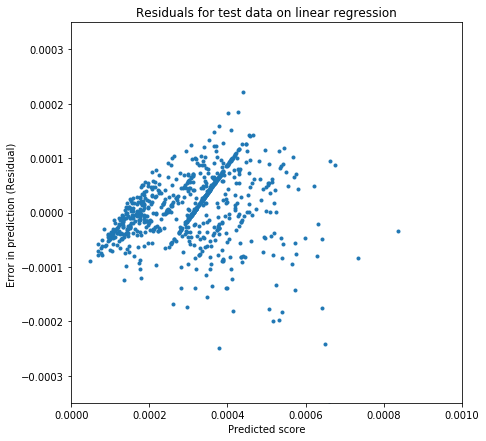

In [442]:
fig = plt.figure(figsize=(7,7))
plt.scatter(test_score,test_score-Y_test,alpha=1,marker='.')
plt.ylim(-0.00035,0.00035)
plt.xlim(0.0,0.001)
plt.ylabel("Error in prediction (Residual) ")
plt.xlabel("Predicted score")
plt.title('Residuals for test data on linear regression')
plt.show()

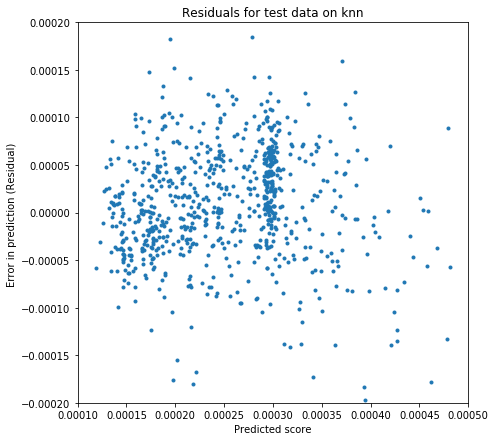

In [443]:
fig = plt.figure(figsize=(7,7))
plt.scatter(test_score_knn,test_score-Y_test,alpha=1,marker='.')
plt.ylim(-0.0002,0.0002)
plt.xlim(0.0001,0.0005)
plt.ylabel("Error in prediction (Residual) ")
plt.xlabel("Predicted score")
plt.title('Residuals for test data on knn')
plt.show()

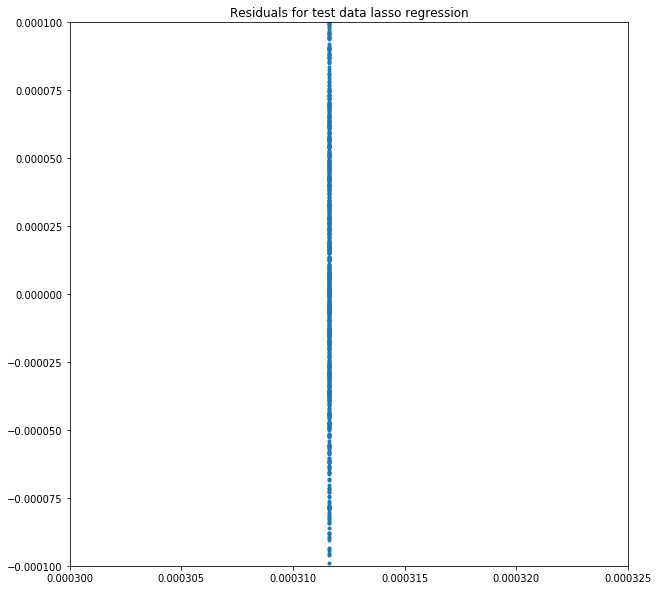

In [427]:
fig = plt.figure(figsize=(10,10))
plt.scatter(test_score_lasso,test_score-Y_test,alpha=1,marker='.')
plt.ylim(-0.0001,0.0001)
plt.xlim(0.0003,0.000325)
plt.title('Residuals for test data lasso regression')
plt.show()

In [428]:
from sklearn.linear_model import BayesianRidge

In [430]:
ridge= BayesianRidge(compute_score=True)
ridge.fit(X_train,Y_train)
train_score_ridge=ridge.predict(X_train)
test_score_ridge=ridge.predict(X_test)

mse_train_ridge=np.sqrt(np.mean((Y_train-train_score_ridge)**2))
mse_test_ridge=np.sqrt(np.mean((Y_test-test_score_ridge)**2))
print("training_error",mse_train_ridge)
print("testing_error",mse_test_ridge)
r2=ridge.score(X_test,Y_test)
print("r2",r2)

('training_error', 0.00011492139705496999)
('testing_error', 0.00019551363632398222)
('r2', 0.41546362489270167)


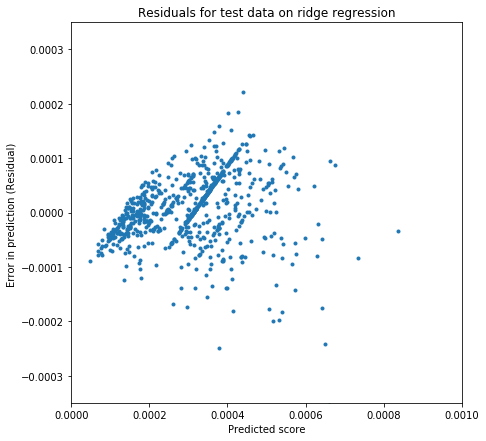

In [444]:
fig = plt.figure(figsize=(7,7))
plt.scatter(test_score_ridge,test_score-Y_test,alpha=1,marker='.')
plt.ylim(-0.00035,0.00035)
plt.xlim(0.0,0.001)
plt.ylabel("Error in prediction (Residual) ")
plt.xlabel("Predicted score")
plt.title('Residuals for test data on ridge regression')
plt.show()

In [451]:
data_new.columns

Index([u'Unnamed: 0', u'vertex_number', u'f1', u'f2', u'f3', u'f4', u'f5',
       u'f6', u'f7', u'f8', u'f9', u'f10', u'f11', u'f12', u'f13', u'f14',
       u'f15', u'f16', u'f17', u'f18', u'f19', u'f20', u'f21', u'f22', u'f23',
       u'f24', u'f25', u'f26', u'f27', u'f28', u'f29', u'f30', u'f31', u'f32',
       u'f33', u'f34', u'f35', u'f36', u'f37', u'f38', u'f39', u'f40', u'f41',
       u'f42', u'f43', u'f44', u'f45', u'f46', u'f47', u'f48', u'f49', u'f50',
       u'f51', u'f52', u'f53', u'f54', u'f55', u'f56', u'f57', u'f58', u'f59',
       u'f60', u'f61', u'f62', u'f63', u'f64', u'id', u'abstract', u'authors',
       u'doi', u'isbn', u'issn', u'issue', u'keywords', u'lang', u'n_citation',
       u'page_end', u'page_start', u'pdf', u'references', u'title', u'url',
       u'venue', u'volume', u'year', u'score', u'score_2', u'pagerank',
       u'citations'],
      dtype='object')

In [452]:
x_temp=data_new.loc[:,['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64'
                    ]]

In [453]:
y_temp=knn.predict(x_temp)

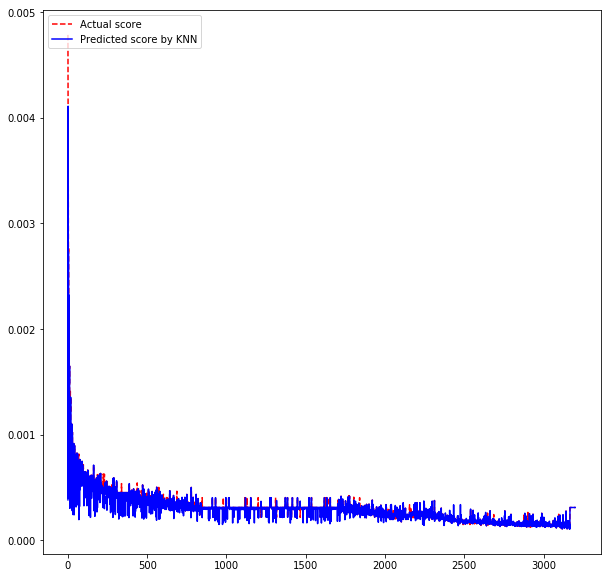

In [456]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(data_new['pagerank'],'r--',label='Actual score')
ax1.plot(y_temp,'b-',label="Predicted score by KNN")
#ax1.plot(test_score_knn,'b-',label='KNN Score')
#ax1.scatter(data_new['pagerank'],  data_new['citations'],c='r', alpha=0.50,marker='.',label='PageRank')
#ax1.scatter(test_score_knn,  citations_test,c='b', alpha=0.50,marker='.',label='Predicted score')


plt.legend(loc=2)
plt.show()

In [473]:
G1=nx.DiGraph()

In [474]:
for key,value in citation_graph_adj_list.iteritems():
    for v in value:
        G1.add_edge(key,v)

In [475]:
pr = nx.pagerank(G1.to_undirected(),max_iter=10000)

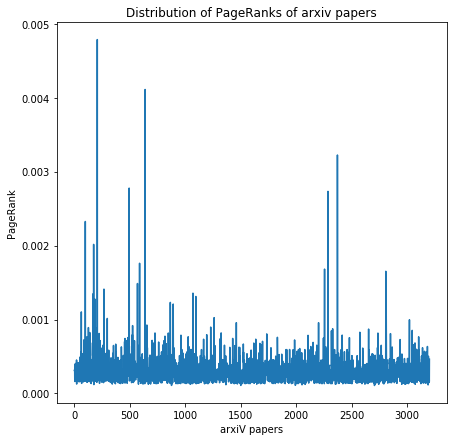

In [476]:
fig = plt.figure()
fig.set_size_inches(7, 7)
plt.plot(pr.values())
plt.ylabel("PageRank")
plt.xlabel("arxiV papers")
plt.title("Distribution of PageRanks of arxiv papers")
plt.show()

In [480]:
data_new.columns

Index([u'Unnamed: 0', u'vertex_number', u'f1', u'f2', u'f3', u'f4', u'f5',
       u'f6', u'f7', u'f8', u'f9', u'f10', u'f11', u'f12', u'f13', u'f14',
       u'f15', u'f16', u'f17', u'f18', u'f19', u'f20', u'f21', u'f22', u'f23',
       u'f24', u'f25', u'f26', u'f27', u'f28', u'f29', u'f30', u'f31', u'f32',
       u'f33', u'f34', u'f35', u'f36', u'f37', u'f38', u'f39', u'f40', u'f41',
       u'f42', u'f43', u'f44', u'f45', u'f46', u'f47', u'f48', u'f49', u'f50',
       u'f51', u'f52', u'f53', u'f54', u'f55', u'f56', u'f57', u'f58', u'f59',
       u'f60', u'f61', u'f62', u'f63', u'f64', u'id', u'abstract', u'authors',
       u'doi', u'isbn', u'issn', u'issue', u'keywords', u'lang', u'n_citation',
       u'page_end', u'page_start', u'pdf', u'references', u'title', u'url',
       u'venue', u'volume', u'year', u'score', u'score_2', u'pagerank',
       u'citations'],
      dtype='object')

In [481]:
old_data=data_new.loc[:,['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64','score_2']]

In [483]:
Y_old=old_data['score_2']
X_old=old_data.drop('score_2',1)

In [484]:
X_train_old,X_test_old,Y_train_old,Y_test_old=cross_validation.train_test_split(X_old,Y_old,test_size=0.25,random_state=5)

In [485]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2400, 64)
(801, 64)
(2400,)
(801,)


In [489]:
linearmodel_old=LinearRegression()
linearmodel_old.fit(X_train_old,Y_train_old)
train_score=linearmodel_old.predict(X_train_old)
test_score=linearmodel_old.predict(X_test_old)

mse_train=np.mean((Y_train_old-train_score)**2)
mse_test=np.mean((Y_test_old-test_score)**2)
print("training_error",mse_train)
print("testing_error",mse_test)
r2=linearmodel_old.score(X_test_old,Y_test_old)
print("r2",r2)

('training_error', 9.035609467195616)
('testing_error', 9.222021665510718)
('r2', -0.0091232511871928157)


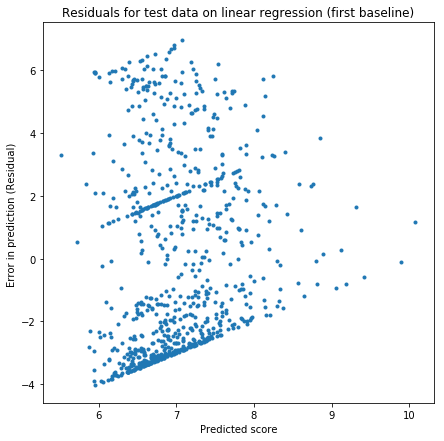

In [491]:
fig = plt.figure(figsize=(7,7))
plt.scatter(test_score,test_score-Y_test_old,alpha=1,marker='.')
#plt.ylim(-0.00035,0.00035)
#plt.xlim(0.0,0.001)
plt.ylabel("Error in prediction (Residual) ")
plt.xlabel("Predicted score")
plt.title('Residuals for test data on linear regression (first baseline)')
plt.show()

In [492]:
data_new.columns

Index([u'Unnamed: 0', u'vertex_number', u'f1', u'f2', u'f3', u'f4', u'f5',
       u'f6', u'f7', u'f8', u'f9', u'f10', u'f11', u'f12', u'f13', u'f14',
       u'f15', u'f16', u'f17', u'f18', u'f19', u'f20', u'f21', u'f22', u'f23',
       u'f24', u'f25', u'f26', u'f27', u'f28', u'f29', u'f30', u'f31', u'f32',
       u'f33', u'f34', u'f35', u'f36', u'f37', u'f38', u'f39', u'f40', u'f41',
       u'f42', u'f43', u'f44', u'f45', u'f46', u'f47', u'f48', u'f49', u'f50',
       u'f51', u'f52', u'f53', u'f54', u'f55', u'f56', u'f57', u'f58', u'f59',
       u'f60', u'f61', u'f62', u'f63', u'f64', u'id', u'abstract', u'authors',
       u'doi', u'isbn', u'issn', u'issue', u'keywords', u'lang', u'n_citation',
       u'page_end', u'page_start', u'pdf', u'references', u'title', u'url',
       u'venue', u'volume', u'year', u'score', u'score_2', u'pagerank',
       u'citations'],
      dtype='object')

In [545]:
X_temp=data_new.loc[:,['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64'
                    ]]
linear_score=linearmodel.predict(X_temp)

In [514]:
linear_score

array([  1.82335688e-04,  -1.30801803e-04,   3.38976476e-04,
         3.54530193e-04,   3.76228867e-04,   1.68224141e-04,
         2.92471030e-04,   1.06597607e-04,   3.97262680e-04,
         1.14492903e-04,   6.77081171e-05,   2.42622849e-04,
         1.97312179e-04,   1.47748476e-04,   5.21461975e-04,
         6.83208433e-05,   2.34710319e-04,   5.43014611e-04,
         5.09516724e-04,   2.03886047e-04,   1.93268613e-04,
         2.14014979e-04,   3.85618399e-04,   3.89461502e-04,
         1.52853892e-04,   2.88769914e-04,   3.05313849e-04,
         4.01143423e-04,   5.67603648e-04,   1.49280127e-04,
         3.24841503e-04,   1.70667591e-04,   2.05846914e-04,
         6.62553257e-04,   2.82157492e-04,   6.22490340e-04,
         4.55616675e-04,   3.36362016e-04,   2.93398102e-04,
         1.31360177e-04,   3.79679142e-04,   3.17577788e-04,
         1.71132839e-04,   1.85086622e-04,   1.79560789e-04,
         1.45616842e-04,   3.37718370e-04,   1.78303179e-04,
         4.19057965e-04,

In [498]:
bins=np.arange(1,10)

In [687]:
hist,bins=np.histogram(data_new['citations'],3)

In [504]:
labels

(array([  34,  615, 1279, 1066,  167,   30,    8,    1,    0,    1]),
 array([ -1.31638828e-04,   2.76351045e-05,   1.86909037e-04,
          3.46182969e-04,   5.05456901e-04,   6.64730833e-04,
          8.24004765e-04,   9.83278697e-04,   1.14255263e-03,
          1.30182656e-03,   1.46110049e-03]))

In [542]:
colormap = numpy.array(['red', 'lime', 'black', 'green','blue', 'purple', 'yellow', 'pink', 'orange', 'cyan','black','red'])

In [693]:
bins=np.array([3.0, 10.0])

In [694]:
labels=np.digitize(data_new['citations'],bins)

In [695]:
labels

array([0, 0, 2, ..., 0, 0, 0])

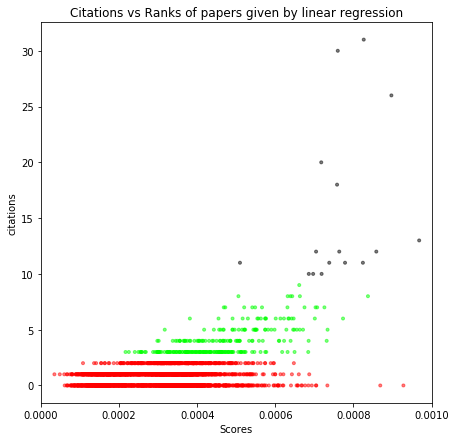

In [696]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(linear_score, data_new['citations'],c=colormap[labels], alpha=0.50,marker='.',label='PageRank')
#ax1.scatter(test_score_svr,  citations_test,c='b', alpha=0.50,marker='.',label='Predicted score')
plt.xlabel("Scores")
plt.ylabel("citations")
#plt.yticks(np.arange(0,35, 1))
#plt.xticks(np.arange(0,0.001,0.0001))
plt.xlim(0,0.001)
#plt.ylim(0, 0)
#plt.legend(loc=2)
plt.title("Citations vs Ranks of papers given by linear regression")
plt.show()

In [540]:
colormap[labels]

IndexError: index 11 is out of bounds for axis 1 with size 11

In [541]:
labels

array([ 3,  1,  5,  5,  5,  3,  4,  3,  5,  3,  2,  4,  3,  3,  6,  2,  4,
        6,  6,  3,  3,  4,  5,  5,  3,  4,  4,  5,  7,  3,  4,  3,  3,  7,
        4,  7,  6,  5,  4,  3,  5,  4,  3,  3,  3,  3,  5,  3,  5,  4,  5,
        3,  5,  5,  3,  6,  5,  5,  4,  4,  5,  5,  4,  4,  8,  4,  5,  5,
        6,  4,  2,  4,  5,  5,  3,  4,  4, 11,  5,  4,  3,  5,  5,  5,  5,
        4,  5,  3,  4,  3,  4,  3,  4,  3,  6,  4,  5,  3,  5,  7,  4,  6,
        4,  5,  3,  4,  4,  4,  3,  5,  5,  2,  5,  5,  4,  6,  5,  3,  2,
        5,  4,  5,  5,  5,  1,  6,  4,  5,  3,  4,  5,  5,  4,  5,  5,  5,
        6,  4,  3,  3,  4,  5,  5,  6,  4,  5,  4,  3,  5,  4,  3,  4,  5,
        5,  4,  5,  4,  5,  5,  3,  5,  3,  3,  5,  3,  4,  6,  4,  3,  5,
        5,  3,  4,  6,  3,  5,  4,  4,  5,  5,  5,  2,  5,  4,  5,  4,  3,
        5,  4,  3,  2,  4,  6,  4,  5,  4,  5,  5,  3,  3,  5,  3,  5,  5,
        5,  2,  6,  3,  5,  4,  3,  3,  5,  5,  5,  4,  4,  3,  5,  3,  6,
        4,  4,  5,  5,  5

In [553]:
knn_score=knn.predict(X_temp)

In [555]:
hist,bins=np.histogram(knn_score,10)

In [556]:
labels=np.digitize(knn_score,bins)

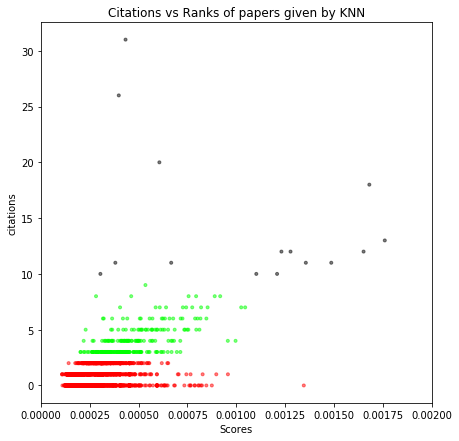

In [697]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(knn_score, data_new['citations'],c=colormap[labels], alpha=0.50,marker='.',label='PageRank')
#ax1.scatter(test_score_svr,  citations_test,c='b', alpha=0.50,marker='.',label='Predicted score')
plt.xlabel("Scores")
plt.ylabel("citations")
#plt.yticks(np.arange(0,35, 1))
#plt.xticks(np.arange(0,0.001,0.0001))
plt.xlim(0,0.0020)
#plt.ylim(0, 0)
#plt.legend(loc=2)
plt.title("Citations vs Ranks of papers given by KNN")
plt.show()

In [561]:
ridge_score=ridge.predict(X_temp)

In [562]:
hist,bins=np.histogram(ridge_score,10)
labels=np.digitize(ridge_score,bins)

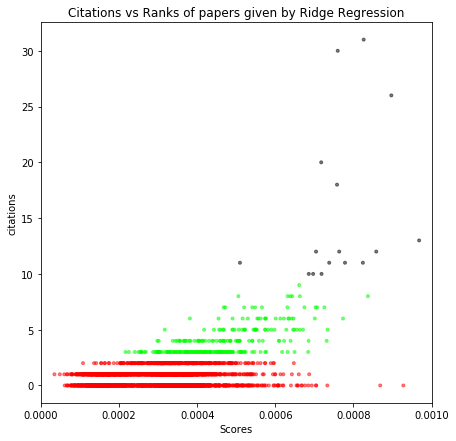

In [698]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(ridge_score, data_new['citations'],c=colormap[labels], alpha=0.50,marker='.',label='PageRank')
#ax1.scatter(test_score_svr,  citations_test,c='b', alpha=0.50,marker='.',label='Predicted score')
plt.xlabel("Scores")
plt.ylabel("citations")
#plt.yticks(np.arange(0,35, 1))
#plt.xticks(np.arange(0,0.001,0.0001))
plt.xlim(0,0.0010)
#plt.ylim(0, 0)
#plt.legend(loc=2)
plt.title("Citations vs Ranks of papers given by Ridge Regression")
plt.show()

In [566]:
linear_score_old=linearmodel_old.predict(X_temp)
hist,bins=np.histogram(linear_score_old,10)
labels=np.digitize(linear_score_old,bins)

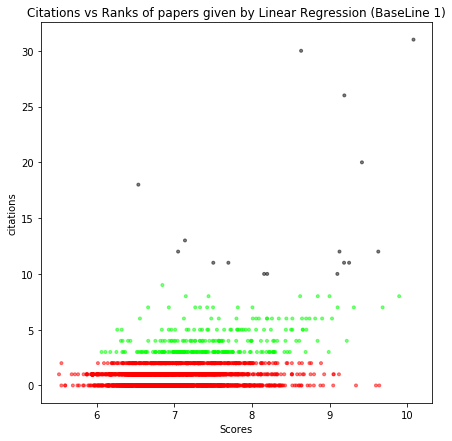

In [699]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(linear_score_old, data_new['citations'],c=colormap[labels], alpha=0.50,marker='.',label='PageRank')
#ax1.scatter(test_score_svr,  citations_test,c='b', alpha=0.50,marker='.',label='Predicted score')
plt.xlabel("Scores")
plt.ylabel("citations")
#plt.yticks(np.arange(0,35, 1))
#plt.xticks(np.arange(0,0.001,0.0001))
#plt.xlim(0,0.0010)
#plt.ylim(0, 0)
#plt.legend(loc=2)
plt.title("Citations vs Ranks of papers given by Linear Regression (BaseLine 1)")
plt.show()

In [568]:
from sklearn.metrics import confusion_matrix
hist,bins=np.histogram(data_new['pagerank'],10)
labels_actual=np.digitize(data_new['pagerank'],bins)

In [570]:
h,b=np.histogram(linear_score,10)
labels_lr=np.digitize(linear_score,b)

In [572]:
confusion_mat_lr=confusion_matrix(labels_actual,labels_lr)

In [573]:
confusion_mat_lr

array([[  34,  615, 1279, 1046,   80,    0,    0,    0,    0,    0],
       [   0,    0,    0,   20,   87,   19,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    8,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0]])

In [574]:
h,b=np.histogram(knn_score,10)
labels_knn=np.digitize(knn_score,b)
confusion_mat_knn=confusion_matrix(labels_actual,labels_knn)
confusion_mat_knn

array([[3006,   48,    0,    0,    0,    0,    0,    0,    0],
       [  22,  100,    5,    0,    0,    0,    0,    0,    0],
       [   2,    0,    5,    3,    0,    0,    0,    0,    0],
       [   0,    0,    0,    2,    1,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    1,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0]])

In [575]:
confusion_mat_temp=confusion_matrix(labels_actual,labels_actual)
confusion_mat_temp

array([[3054,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  127,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   10,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    3,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1]])

In [578]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [603]:
l=np.arange(1,len(b))
plot_confusion_matrix(confusion_mat_lr, classes=l, normalize=False,
                      title='Confusion matrix for linear regression')

Confusion matrix, without normalization
[[  34  615 1279 1046   80    0    0    0    0    0]
 [   0    0    0   20   87   19    1    0    0    0]
 [   0    0    0    0    0    8    2    0    0    0]
 [   0    0    0    0    0    1    2    0    0    0]
 [   0    0    0    0    0    1    1    0    0    0]
 [   0    0    0    0    0    1    1    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    1    0    0]]


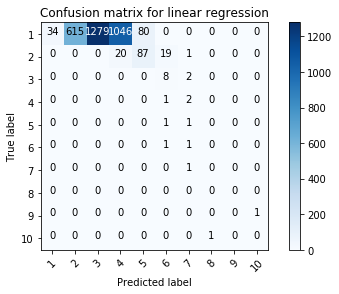

In [604]:
plt.show()

In [594]:
plot_confusion_matrix(confusion_mat_knn, classes=l, normalize=False,
                      title='Confusion matrix for KNN')

Confusion matrix, without normalization
[[3006   48    0    0    0    0    0    0    0]
 [  22  100    5    0    0    0    0    0    0]
 [   2    0    5    3    0    0    0    0    0]
 [   0    0    0    2    1    0    0    0    0]
 [   0    1    0    0    0    1    0    0    0]
 [   1    0    0    0    0    0    1    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0]]


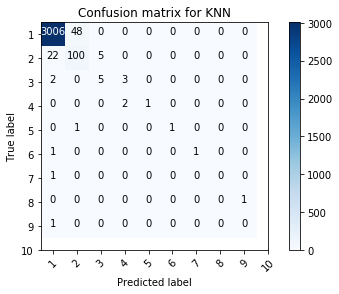

In [595]:
plt.show()

In [596]:
plot_confusion_matrix(confusion_mat_temp, classes=l, normalize=False,
                      title='Confusion matrix for pagerank')

Confusion matrix, without normalization
[[3054    0    0    0    0    0    0    0    0]
 [   0  127    0    0    0    0    0    0    0]
 [   0    0   10    0    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0    0]
 [   0    0    0    0    2    0    0    0    0]
 [   0    0    0    0    0    2    0    0    0]
 [   0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0    1]]


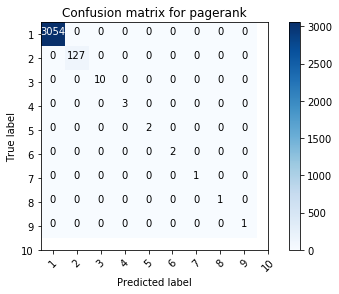

In [597]:
plt.show()

In [598]:
h,b=np.histogram(ridge_score,10)
labels_ridge=np.digitize(ridge_score,b)
confusion_mat_ridge=confusion_matrix(labels_actual,labels_ridge)
confusion_mat_ridge

array([[  34,  615, 1279, 1046,   80,    0,    0,    0,    0,    0],
       [   0,    0,    0,   20,   87,   19,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    8,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0]])

Confusion matrix, without normalization
[[  34  615 1279 1046   80    0    0    0    0    0]
 [   0    0    0   20   87   19    1    0    0    0]
 [   0    0    0    0    0    8    2    0    0    0]
 [   0    0    0    0    0    1    2    0    0    0]
 [   0    0    0    0    0    1    1    0    0    0]
 [   0    0    0    0    0    1    1    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    1    0    0]]


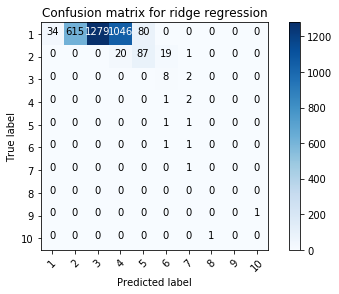

In [600]:
plot_confusion_matrix(confusion_mat_ridge, classes=l, normalize=False,
                      title='Confusion matrix for ridge regression')
plt.show()

In [655]:
df = pd.DataFrame({'score': linear_score.ravel(), 'rank':data_new['pagerank'].ravel()})

In [656]:
df.describe()

,rank,score
count,3201.000000,3201.000000
mean,0.000312,0.000310
std,0.000200,0.000136
min,0.000108,-0.000132
25%,0.000215,0.000209
50%,0.000312,0.000320
75%,0.000329,0.000383
max,0.004784,0.001461


In [657]:
q = df["score"].quantile(0.80)

In [658]:
df=df[df["score"] < q]

In [659]:
df.describe()

,rank,score
count,2560.000000,2560.000000
mean,0.000261,0.000264
std,0.000080,0.000100
min,0.000108,-0.000132
25%,0.000186,0.000186
50%,0.000279,0.000291
75%,0.000312,0.000346
max,0.000628,0.000400


In [660]:
#q1= df["score"].quantile(0.05)
#df=df[df["score"] > q1]

In [661]:
df.describe()

,rank,score
count,2560.000000,2560.000000
mean,0.000261,0.000264
std,0.000080,0.000100
min,0.000108,-0.000132
25%,0.000186,0.000186
50%,0.000279,0.000291
75%,0.000312,0.000346
max,0.000628,0.000400


In [662]:
hist,bins=np.histogram(df['rank'],10)
labels_actual=np.digitize(df['rank'],bins)

In [663]:
h,b=np.histogram(df['score'],10)
labels_lr=np.digitize(df['score'],bins)

Confusion matrix, without normalization
[[  0   0   0   0   0   0   0   0   0   0   0]
 [ 81 182  68  14   2   0   0   0   0   0   0]
 [  9 127 223  72  15   0   0   0   0   0   0]
 [  1  11  70 145 134  49  17   0   0   0   0]
 [ 34   2  10  48 227 470 216   0   0   0   0]
 [  0   0   1  11  41  59  42   0   0   0   0]
 [  0   0   0   1  19  46  48   0   0   0   0]
 [  0   0   0   1   6  21  20   0   0   0   0]
 [  0   0   0   0   1   4   7   0   0   0   0]
 [  0   0   0   0   0   1   3   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0]]


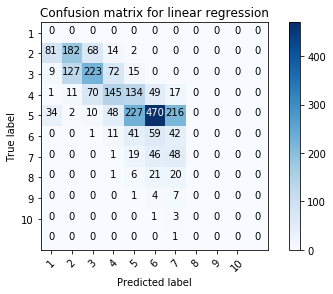

In [675]:
confmat_lr=confusion_matrix(labels_actual,labels_lr)
plot_confusion_matrix(confmat_lr, classes=l, normalize=False,
                      title='Confusion matrix for linear regression')
plt.show()

In [774]:
def plot_cf(score,title):
    df = pd.DataFrame({'score': score.ravel(), 'rank':data_new['pagerank'].ravel()})
    #df=df.sort_values('rank',ascending = True).head(3054)
    hist,bins=np.histogram(df['rank'],10)
    labels_actual=np.digitize(df['rank'],bins)
    print(labels_actual)
    h,b=np.histogram(df['score'],10)
    labels_lr=np.digitize(df['score'],bins)
    confmat_lr=confusion_matrix(labels_actual,labels_lr)
    plot_confusion_matrix(confmat_lr, classes=l, normalize=False,
                      title=title)
    plt.show()

Confusion matrix, without normalization
[[267  30   4   0   0   0   0   0   0   0   0]
 [  6 406  31   2   0   1   0   0   0   0   0]
 [  5  11 358  18  10   3   0   0   0   0   0]
 [  1   9  18 181   7   1   0   0   0   0   0]
 [  2  36  16  69 951  11   2   0   0   0   0]
 [  0   1   3  12  14 131   0   0   0   0   0]
 [  0   4  12  11   7  11 126   2   0   0   0]
 [  0   0  12  10   4   7   5 117   0   0   0]
 [  0   0   2   1   1   5   5   2  51   0   0]
 [  0   0   2   2   4   1   2   1   0  29   0]
 [  0   0   0   1   0   0   0   0   0   0   0]]


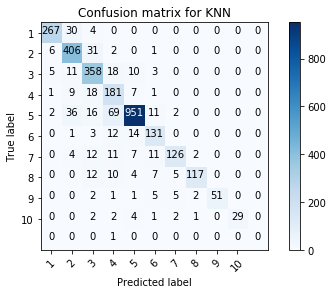

In [712]:
plot_cf(knn_score,'Confusion matrix for KNN')

Confusion matrix, without normalization
[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [ 77 143  72   8   1   0   0   0   0   0   0   0]
 [ 12 122 190 104  14   4   0   0   0   0   0   0]
 [  0  11  64 113 120  71  20   4   2   0   0   0]
 [  1   5   9  30  41  63  46  18   2   1   1   0]
 [ 34   0   2   8 104 336 418 160  23   2   0   0]
 [  0   0   0   7   7  36  41  44  23   3   0   0]
 [  0   0   0   0   4  27  41  55  27  10   9   0]
 [  0   0   0   0   1   6  25  33  40  34  13   3]
 [  0   0   0   0   0   1   7   9  21  20   4   5]
 [  0   0   0   0   0   0   1   8   7  12  10   3]
 [  0   0   0   0   0   0   0   0   0   0   0   1]]


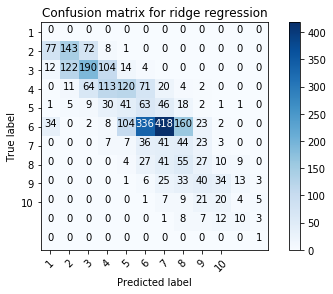

In [713]:

plot_cf(ridge_score,'Confusion matrix for ridge regression')

Confusion matrix, without normalization
[[3054    0    0    0    0    0    0    0    0]
 [  25  102    0    0    0    0    0    0    0]
 [   2    0    8    0    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0    0]
 [   0    1    0    0    1    0    0    0    0]
 [   1    0    0    0    0    1    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    1    0]
 [   1    0    0    0    0    0    0    0    0]]


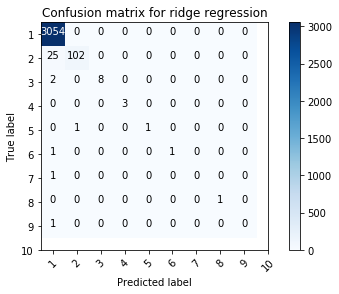

In [705]:
df = pd.DataFrame({'score': knn_score.ravel(), 'rank':data_new['pagerank'].ravel()})
#q = df["score"].quantile(0.99)
#df=df[df["score"] < q]
hist,bins=np.histogram(df['rank'],10)
labels_actual=np.digitize(df['rank'],bins)
h,b=np.histogram(df['score'],10)
labels_lr=np.digitize(df['score'],bins)
confmat_lr=confusion_matrix(labels_actual,labels_lr)
plot_confusion_matrix(confmat_lr, classes=l, normalize=False,
                  title="Confusion matrix for ridge regression")
plt.show()

In [707]:
df1 = df.sort_values('rank',ascending = True).head(3054)
print (df1)

          rank     score
3166  0.000108  0.000108
3163  0.000109  0.000109
3118  0.000109  0.000109
3149  0.000110  0.000110
3138  0.000116  0.000123
3132  0.000117  0.000117
3081  0.000119  0.000119
3107  0.000120  0.000120
3150  0.000123  0.000123
3119  0.000124  0.000124
3161  0.000124  0.000139
3152  0.000124  0.000124
2955  0.000124  0.000124
2918  0.000124  0.000172
3010  0.000125  0.000125
3130  0.000125  0.000125
3045  0.000125  0.000125
3116  0.000126  0.000129
3155  0.000126  0.000126
3129  0.000126  0.000119
2893  0.000127  0.000127
2958  0.000127  0.000127
3147  0.000127  0.000127
3115  0.000128  0.000128
3143  0.000128  0.000155
3112  0.000128  0.000128
3113  0.000129  0.000129
3103  0.000131  0.000131
3054  0.000131  0.000129
3073  0.000131  0.000131
...        ...       ...
153   0.000539  0.000539
219   0.000539  0.000365
193   0.000541  0.000541
121   0.000543  0.000543
437   0.000545  0.000311
151   0.000545  0.000545
210   0.000548  0.000548
127   0.000551  0.000551


Confusion matrix, without normalization
[[267  30   4   0   0   0   0   0   0   0   0]
 [  6 406  31   2   0   1   0   0   0   0   0]
 [  5  11 358  18  10   3   0   0   0   0   0]
 [  1   9  18 181   7   1   0   0   0   0   0]
 [  2  36  16  69 951  11   2   0   0   0   0]
 [  0   1   3  12  14 131   0   0   0   0   0]
 [  0   4  12  11   7  11 126   2   0   0   0]
 [  0   0  12  10   4   7   5 117   0   0   0]
 [  0   0   2   1   1   5   5   2  51   0   0]
 [  0   0   2   2   4   1   2   1   0  29   0]
 [  0   0   0   1   0   0   0   0   0   0   0]]


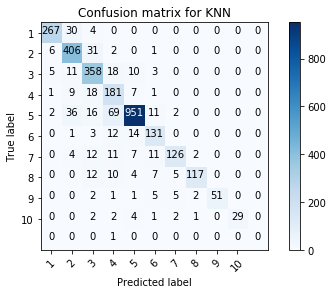

In [709]:
hist,bins=np.histogram(df1['rank'],10)
labels_actual=np.digitize(df1['rank'],bins)
h,b=np.histogram(df1['score'],10)
labels_lr=np.digitize(df1['score'],bins)
confmat_lr=confusion_matrix(labels_actual,labels_lr)
plot_confusion_matrix(confmat_lr, classes=l, normalize=False,
                  title="Confusion matrix for KNN")
plt.show()

Confusion matrix, without normalization
[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [ 77 143  72   8   1   0   0   0   0   0   0   0]
 [ 13 121 190 104  14   4   0   0   0   0   0   0]
 [  0  11  64 113 120  71  20   4   2   0   0   0]
 [  1   5   9  30  41  63  46  18   2   1   1   0]
 [ 34   0   2   8 104 336 418 160  23   2   0   0]
 [  0   0   0   7   7  36  41  44  23   3   0   0]
 [  0   0   0   0   4  27  41  55  27  10   9   0]
 [  0   0   0   0   1   6  25  33  40  34  13   3]
 [  0   0   0   0   0   1   7   9  21  20   4   5]
 [  0   0   0   0   0   0   1   8   7  12  10   3]
 [  0   0   0   0   0   0   0   0   0   0   0   1]]


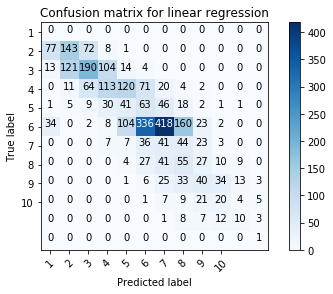

In [714]:
plot_cf(linear_score,'Confusion matrix for linear regression')

Confusion matrix, without normalization
[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [ 77 143  72   8   1   0   0   0   0   0   0   0]
 [ 12 122 190 104  14   4   0   0   0   0   0   0]
 [  0  11  64 113 120  71  20   4   2   0   0   0]
 [  1   5   9  30  41  63  46  18   2   1   1   0]
 [ 34   0   2   8 104 336 418 160  23   2   0   0]
 [  0   0   0   7   7  36  41  44  23   3   0   0]
 [  0   0   0   0   4  27  41  55  27  10   9   0]
 [  0   0   0   0   1   6  25  33  40  34  13   3]
 [  0   0   0   0   0   1   7   9  21  20   4   5]
 [  0   0   0   0   0   0   1   8   7  12  10   3]
 [  0   0   0   0   0   0   0   0   0   0   0   1]]


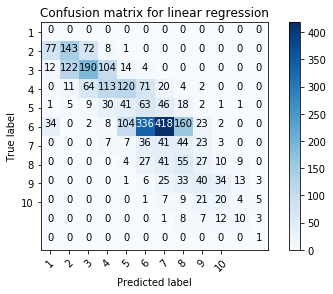

In [715]:
plot_cf(ridge_score,'Confusion matrix for linear regression')

In [745]:
def plot_error(score,title):
    df = pd.DataFrame({'score': score.ravel(), 'rank':data_new['pagerank'].ravel()})
    df=df.sort_values('rank',ascending = True).head(1000)
    error=df['score']-df['rank']
    plt.figure(figsize=(7,7))
    plt.ylabel('number of papers')
    plt.hist(error,normed=1)
    plt.title(title)
    plt.show()

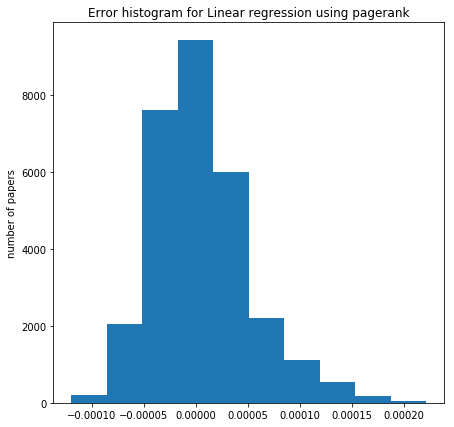

In [746]:
plot_error(linear_score,'Error histogram for Linear regression using pagerank')

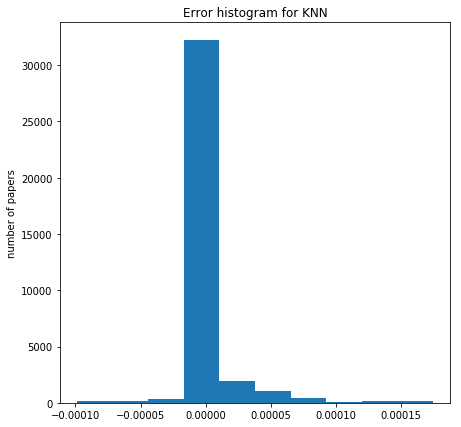

In [747]:
plot_error(knn_score,'Error histogram for KNN')

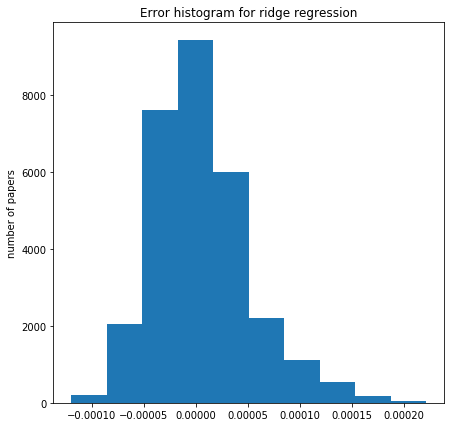

In [748]:
plot_error(ridge_score,'Error histogram for ridge regression')

In [758]:
np.mean(np.sqrt((linear_score-data_new['pagerank'])**2))

5.85968876710473e-05

In [759]:
np.mean(np.sqrt((knn_score-data_new['pagerank'])**2))

1.9023944663981056e-05

In [760]:
np.mean(np.sqrt((ridge_score-data_new['pagerank'])**2))

5.858947427146662e-05

ValueError: continuous is not supported

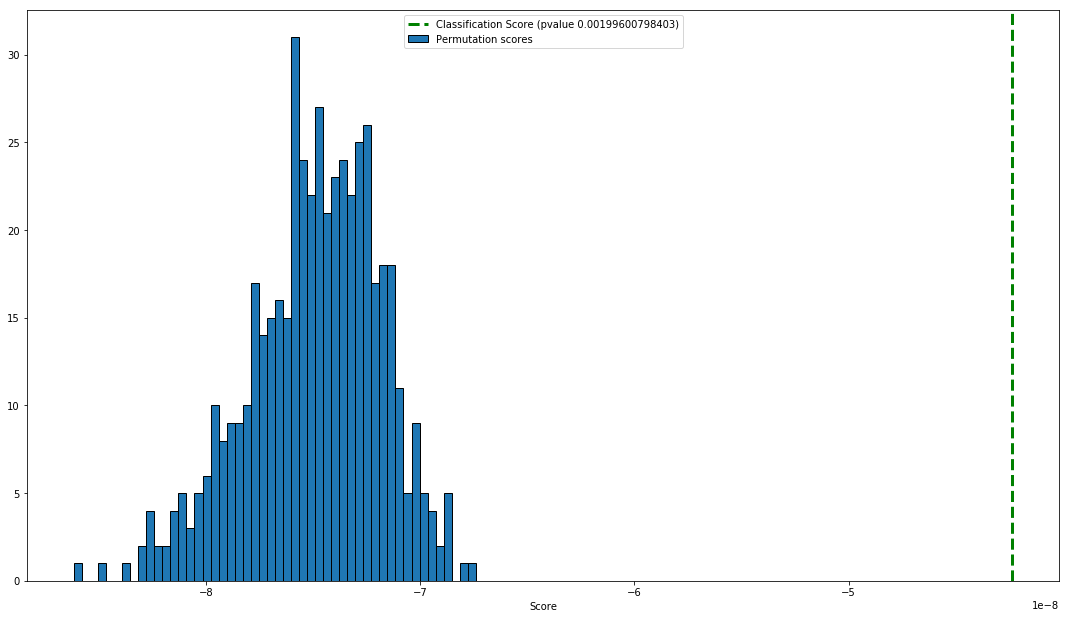

In [762]:
from sklearn.model_selection import permutation_test_score
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
score, permutation_scores, pvalue = permutation_test_score(ridge, X_test, Y_test, n_permutations=500, n_jobs=1,scoring='neg_mean_squared_error')
plt.hist(permutation_scores, 50, label='Permutation scores',edgecolor='black')
ylim = plt.ylim()
plt.plot(2*[score], ylim, '--g', linewidth=3,label='Classification Score (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

In [764]:
data_new.columns

Index([u'Unnamed: 0', u'vertex_number', u'f1', u'f2', u'f3', u'f4', u'f5',
       u'f6', u'f7', u'f8', u'f9', u'f10', u'f11', u'f12', u'f13', u'f14',
       u'f15', u'f16', u'f17', u'f18', u'f19', u'f20', u'f21', u'f22', u'f23',
       u'f24', u'f25', u'f26', u'f27', u'f28', u'f29', u'f30', u'f31', u'f32',
       u'f33', u'f34', u'f35', u'f36', u'f37', u'f38', u'f39', u'f40', u'f41',
       u'f42', u'f43', u'f44', u'f45', u'f46', u'f47', u'f48', u'f49', u'f50',
       u'f51', u'f52', u'f53', u'f54', u'f55', u'f56', u'f57', u'f58', u'f59',
       u'f60', u'f61', u'f62', u'f63', u'f64', u'id', u'abstract', u'authors',
       u'doi', u'isbn', u'issn', u'issue', u'keywords', u'lang', u'n_citation',
       u'page_end', u'page_start', u'pdf', u'references', u'title', u'url',
       u'venue', u'volume', u'year', u'score', u'score_2', u'pagerank',
       u'citations'],
      dtype='object')

In [765]:
t=linearmodel_old.predict(X_temp)

Confusion matrix, without normalization
[[  0   0   0   0   0  19 124   7   0   0   0]
 [  0   0   0   0   0   1 103  43   0   0   0]
 [  0   0   0   0   0   6  76  76   3   0   0]
 [  0   0   0   0   0   9  79  60   4   0   0]
 [  0   0   0   0   0  13 237 163  18   0   0]
 [  0   0   0   0   0   1  66  87   3   1   0]
 [  0   0   0   0   0   2  55  91  19   0   0]
 [  0   0   0   0   0   1  39  63  33   4   0]
 [  0   0   0   0   0   6 159 128  15   1   1]
 [  0   0   0   0   0  10 590 460  76  13   0]
 [  0   0   0   0   0   2  54  28   4   1   0]]


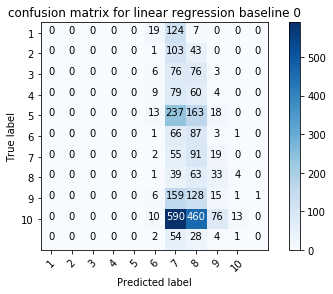

In [766]:
plot_cf(t,'confusion matrix for linear regression baseline 0')

Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    0    0    0]
 [ 125 2918   11    0    0    0    0    0    0    0]
 [   0   61   66    0    0    0    0    0    0    0]
 [   0    0   10    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0]]


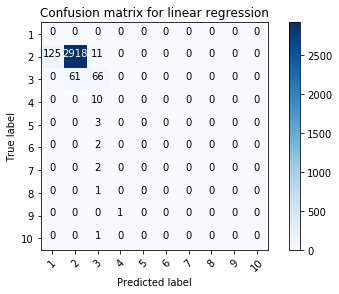

In [771]:
linear_score=linearmodel.predict(X_temp)
plot_cf(linear_score,"Confusion matrix for linear regression")

Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    0    0    0]
 [ 124 2919   11    0    0    0    0    0    0    0]
 [   0   61   66    0    0    0    0    0    0    0]
 [   0    0   10    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0]]


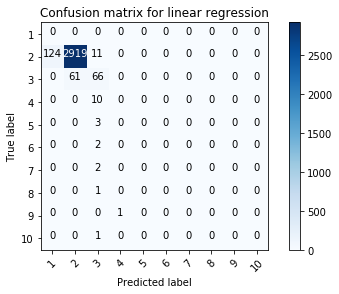

In [772]:
plot_cf(ridge_score,"Confusion matrix for linear regression")

[11  9  7 ...,  1  1  1]
Confusion matrix, without normalization
[[3054    0    0    0    0    0    0    0    0]
 [  25  102    0    0    0    0    0    0    0]
 [   2    0    8    0    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0    0]
 [   0    1    0    0    1    0    0    0    0]
 [   1    0    0    0    0    1    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    1    0]
 [   1    0    0    0    0    0    0    0    0]]


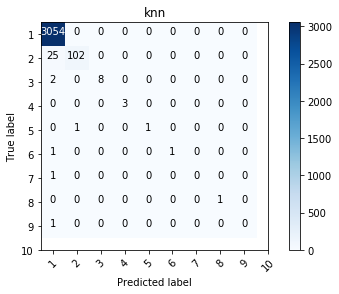

In [775]:
plot_cf(knn_score,"knn")

In [824]:
def somefunc(score,title):
    df = pd.DataFrame({'score': score.ravel(), 'rank':data_new['score_2'].ravel()})
    df=df.sort_values('rank',ascending = True).head(2000)
    hist,bins=np.histogram(df['rank'],10)
    labels_actual=np.digitize(df['rank'],bins)
    #print(labels_actual)
    #print(np.sum(labels_actual==1))
    h,b=np.histogram(df['score'],10)
    labels_lr=np.digitize(df['score'],bins)
    p=np.min(labels_lr)
    q=np.max(labels_lr)
    l=np.arange(0,q)
    #print(np.sum(labels_lr==1))
    #pd.crosstab([1],[1], rownames=['True'], colnames=['Predicted'], margins=True)
    confmat_lr=confusion_matrix(labels_actual,labels_lr)
    #return confmat_lr
    #print(confmat_lr)
    print(l)
    plot_confusion_matrix(confmat_lr, classes=l, normalize=False,
                      title=title)
    plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10]
Confusion matrix, without normalization
[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11   5   5   4   1   0   0   0   0   0   0   0]
 [ 59  38  51  34  23   6   3   2   0   1   0   0]
 [ 16  32  34  44  37  18  18   3   5   0   0   0]
 [  4  12  39  46  52  42  21   9   2   2   3   0]
 [  0   1   4  18  18  22  16  11   4   2   3   0]
 [  0   0   6   6  13  25  22  14  10   9  10  34]
 [  0   1   3   3   7  14  26  38  43  36  41  29]
 [  1   1   1   0   3   3  10   9  11   8   9  27]
 [  0   1   0   1   2   2   2   4   8   9  11  62]
 [  0   0   0   1   1   1   1   6   7   7  14  62]
 [ 34   0   0   0   0   0   2   3  10  18  54 423]]


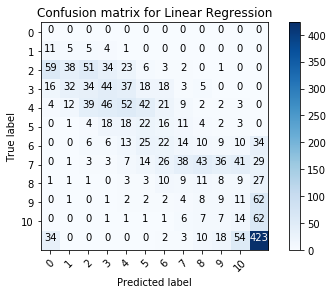

In [819]:
somefunc(linear_score,'Confusion matrix for Linear Regression')

[ 1  2  3  4  5  6  7  8  9 10]
Confusion matrix, without normalization
[[ 22   2   1   1   0   0   0   0   0   0   0]
 [  2 192   8  13   2   0   0   0   0   0   0]
 [  0   2 179  10   5   5   6   0   0   0   0]
 [  0   2   5 207   7   4   6   1   0   0   0]
 [  0   0   0   2  83   4   3   3   0   0   4]
 [  0   3   0   4   3 122   4   3   2   2   6]
 [  0   2   1   3   2  10 212   5   4   1   1]
 [  0   0   1   4   3   3   6  59   1   4   2]
 [  0   0   0   1   1   1   5   2  90   1   1]
 [  0   0   0   2   1   1   4   5   3  78   6]
 [  0   0   7  10   9   1   0   0  14  97 406]]


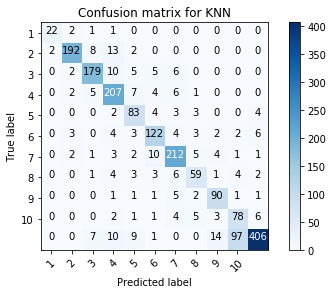

In [818]:
somefunc(knn_score,'Confusion matrix for KNN')

[ 0  1  2  3  4  5  6  7  8  9 10]
Confusion matrix, without normalization
[[  0   0   0   0   0   0  82  59   0   0   0]
 [  0   0   0   0   0   0  38  97   3   0   0]
 [  0   0   0   0   0   1  31  93  20   0   0]
 [  0   0   0   0   0   1  31  92  18   0   0]
 [  0   0   0   0   0   0  50  70  25   0   0]
 [  0   0   0   0   0   0 100 253  63   2   0]
 [  0   0   0   0   0   0  23  90  47   4   1]
 [  0   0   0   0   0   2  11  55  55   8   0]
 [  0   0   0   0   0   0  46 132  29  10   0]
 [  0   0   0   0   0   0  61 204  79   8   2]
 [  0   0   0   0   0   0   1   3   0   0   0]]


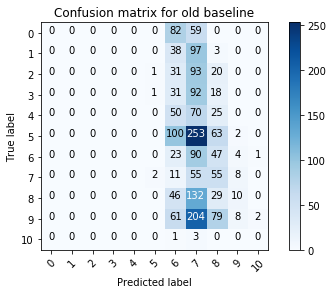

In [825]:
somefunc(t,"Confusion matrix for old baseline")

In [968]:
df=data_new.copy()

In [969]:
df['knn_score']=knn_score

In [970]:
df=df.drop(['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36','f37','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56','f57','f58','f59','f60','f61','f62','f63','f64'
                    ], axis = 1)

In [971]:
df.columns

Index([u'Unnamed: 0', u'vertex_number', u'id', u'abstract', u'authors', u'doi',
       u'isbn', u'issn', u'issue', u'keywords', u'lang', u'n_citation',
       u'page_end', u'page_start', u'pdf', u'references', u'title', u'url',
       u'venue', u'volume', u'year', u'score', u'score_2', u'pagerank',
       u'citations', u'knn_score'],
      dtype='object')

In [972]:
df=df.loc[:,['authors','title','venue','year','n_citation','knn_score','lang']]

In [973]:
#df2=df1.where(df1['lang']=='en')

In [974]:
#trainData=df2.dropna(subset=['title'])

In [975]:
#trainData.shape

In [976]:
df3=df.sort_values('knn_score',ascending = False).head(50)

In [977]:
df3

,authors,title,venue,year,n_citation,knn_score,lang
1,"[{'name': 'Jairo Rocha'}, {'name': 'Theo Pavli...",A solution to the problem of touching and brok...,ICDAR-1,1993.0,NaN,0.004109,en
3,NaN,3G安全体系分析,Telecommuni Cations Information,2005.0,1.0,0.002732,zh
5,"[{'name': ''}, {'name': ''}]",36例甲状腺功能亢进心电图分析,Chinese Journal of Modern Drug Application,2010.0,1.0,0.002325,zh
8,NaN,21世纪数字图书馆发展研究,NaN,2005.0,NaN,0.001761,zh
7,"[{'name': ''}, {'name': ''}]",2004年吉林省政府部门属研究与开发机构发展现状简析,NaN,2006.0,NaN,0.001681,zh
10,[{'name': ''}],2004～2007年我院麻醉药品应用情况分析,Proceeding of Clinical Medicine,2009.0,1.0,0.001652,zh
9,NaN,2000～2004年我国虚拟参考咨询领域研究论文计量分析,Modern Information,2005.0,5.0,0.001487,zh
17,"[{'name': ''}, {'name': ''}, {'name': ''}, {'n...",114例医疗纠纷相关因素分析,Chinese Rural Health Service Administration,2006.0,6.0,0.001356,zh
14,[{'name': ''}],240例围手术期预防性使用抗菌药物调查,Seek Medical and Ask the Medicine,2012.0,NaN,0.001346,zh
13,"[{'name': ''}, {'name': ''}, {'name': ''}]",20m后张法预应力箱梁预制分析及对策,Highways & Transportation in Inner Mongolia,2012.0,2.0,0.001278,zh


In [978]:
for d in df3.itertuples():
    print d[1],d[2],d[3],d[4],d[5]
    

[{'name': 'Jairo Rocha'}, {'name': 'Theo Pavlidis'}] A solution to the problem of touching and broken characters. ICDAR-1 1993.0 nan
nan 3G安全体系分析 Telecommuni Cations Information 2005.0 1.0
[{'name': ''}, {'name': ''}] 36例甲状腺功能亢进心电图分析 Chinese Journal of Modern Drug Application 2010.0 1.0
nan 21世纪数字图书馆发展研究 nan 2005.0 nan
[{'name': ''}, {'name': ''}] 2004年吉林省政府部门属研究与开发机构发展现状简析 nan 2006.0 nan
[{'name': ''}] 2004～2007年我院麻醉药品应用情况分析 Proceeding of Clinical Medicine 2009.0 1.0
nan 2000～2004年我国虚拟参考咨询领域研究论文计量分析 Modern Information 2005.0 5.0
[{'name': ''}, {'name': ''}, {'name': ''}, {'name': ''}] 114例医疗纠纷相关因素分析 Chinese Rural Health Service Administration 2006.0 6.0
[{'name': ''}] 240例围手术期预防性使用抗菌药物调查 Seek Medical and Ask the Medicine 2012.0 nan
[{'name': ''}, {'name': ''}, {'name': ''}] 20m后张法预应力箱梁预制分析及对策 Highways & Transportation in Inner Mongolia 2012.0 2.0
[{'name': ''}, {'name': ''}, {'name': ''}] 2005～2009年仁寿县麻疹流行特征分析 Chinese Community Doctors 2011.0 nan
[{'name': ''}, {'name': ''}, {'name': 